I have used Random Forest Classifier for classifiaction of Melanoma cancer dataset.

Classification_report method from sklearn library has been used to calculate precision, recall and accuracy.
The mean precision  comes out to be 0.724, recall 0.74 and accuracy 0.743 

Stratied sampling and creation of 5 trails averages out the performance of the classifier and reduces the possibility of any bias on the data. It ensures that we check the accuracy of the model on any random combination of data and ensures more stable results than evaluating on only one sample.

The comments have been mentioned before the statements themselves.

In [1]:
#!/usr/local/bin/python
# -*- coding: utf-8 -*-
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
from statistics import mean
from statistics import stdev
import numpy as np
from sklearn.metrics import classification_report

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
''' Read the data and create a dataframe of independent variables by removing records for patients who died with causes not related to Melanoma. '''

melanoma_data = data('Melanoma')
df = melanoma_data[melanoma_data.status != 3]

In [3]:
'''Drop the colums year and time as they do not contribute to the final predictions'''

df = df.drop(['year', 'time'], axis=1)

In [4]:
''' Create dependent and independent variables and normalize all the values in the independent variables dataframe.'''

y = df['status']
X = df.drop(['status'], axis=1)

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [5]:
''' Create a random forest classifier giving more weights to thickness and ulcer columns and then creating Stratified samples with 5 iterations'''

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, class_weight={1: 1.5, 2: 1.5})

sss = StratifiedShuffleSplit(y, n_iter=5, test_size=0.3, random_state=0)
accuracy=[]
recall=[]
precision=[]


In [7]:
'''Split to train/test data, fit random forest classifier and calculate the mean accuracy, precision and recall. '''

for train_idx, test_idx in sss:std_accuracy=stdev(accuracy)
std_precision=stdev([float(x.encode('UTF8')) for x in precision])
std_recall=stdev([float(x.encode('UTF8')) for x in recall])
    X_train, X_test, y_train, y_test = X.values[train_idx], X.values[test_idx], y.values[train_idx], y.values[test_idx]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    recall.append(classification_report(y_test, y_pred)[189:193])
    precision.append(classification_report(y_test, y_pred)[179:183])

mean_accuracy = mean(accuracy)
mean_precision=mean([float(x.encode('UTF8')) for x in precision])
mean_recall=mean([float(x.encode('UTF8')) for x in recall])

In [8]:
'''Calculate standard deviation of 3 metrics'''

std_accuracy=stdev(accuracy)
std_precision=stdev([float(x.encode('UTF8')) for x in precision])
std_recall=stdev([float(x.encode('UTF8')) for x in recall])

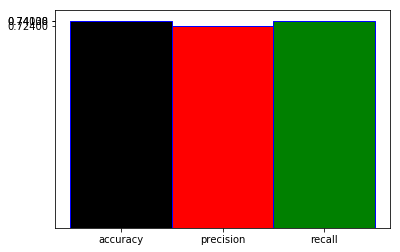

In [9]:
'''Plot the mean of all the metrics for the 5 iteration samples'''

mean_list=[('accuracy',mean_accuracy),('precision', mean_precision), ('recall', mean_recall)]

labels, ys = zip(*mean_list)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, color=['black', 'red', 'green'], edgecolor='blue')
plt.xticks(xs, labels) 
plt.yticks(ys)
plt.show()

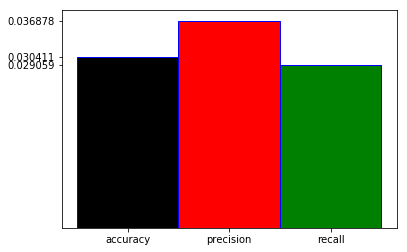

In [10]:
'''Plot the standard deviation of all the metrics for the 5 iteration samples'''

std_list=[('accuracy',std_accuracy),('precision', std_precision), ('recall', std_recall)]

labels, ys = zip(*std_list)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, color=['black', 'red', 'green'], edgecolor='blue')

plt.xticks(xs, labels) 
plt.yticks(ys)
plt.show()